In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basics

## Optimization

In [2]:
from scipy.optimize import minimize

Minimize $$ f(x) = (x-3)^2 $$

In [3]:
def f(x):
    return (x-3)**2

res = minimize(f, 2) #2: initial guess

In [4]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

In [5]:
res.x

array([2.99999999])

In [6]:
res.x[0]

2.999999992549203

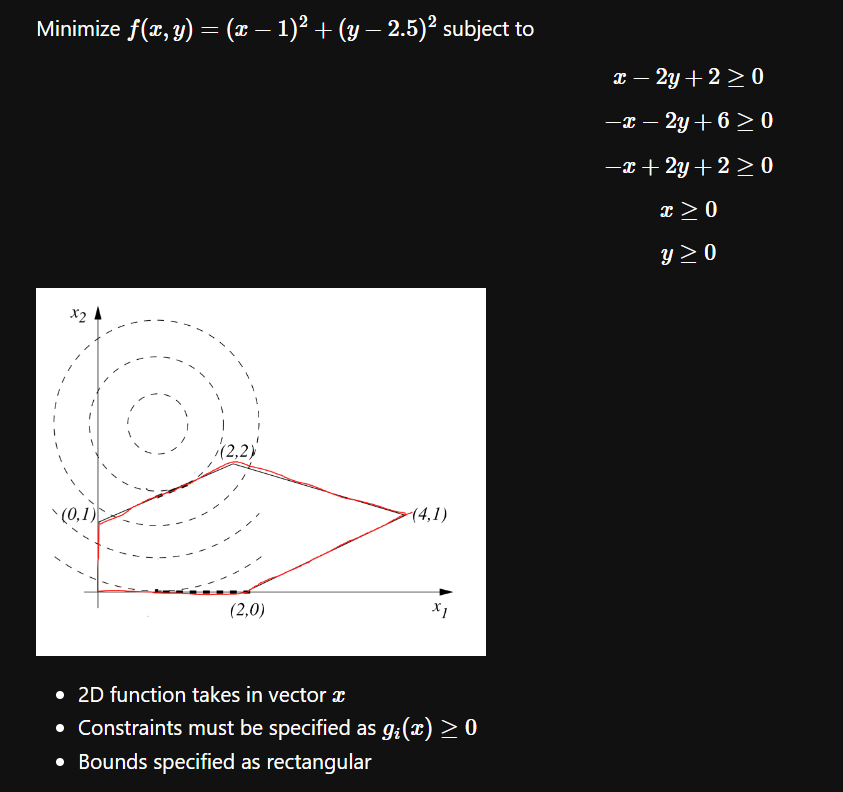

In [7]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

In [8]:
f([2,1])

3.25

In [9]:
cons = ({'type':'ineq', 'fun': lambda x: x[0] - 2*x[1] + 2},
              {'type':'ineq', 'fun': lambda x: -x[0] - 2*x[1] + 6},
              {'type':'ineq', 'fun': lambda x: -x[0] + 2*x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(f, (2,0), bounds=bnds, constraints=cons) #2,0: initial guess

In [10]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

In [11]:
res.x

array([1.4, 1.7])

In [12]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

# Interpolation

Suppose you have the following data: 

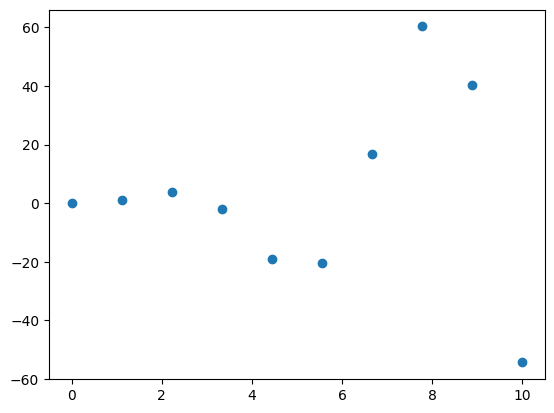

In [13]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

You want to know the values in between.

In [14]:
from scipy.interpolate import interp1d

In [15]:
f = interp1d(x, y, kind = 'linear')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

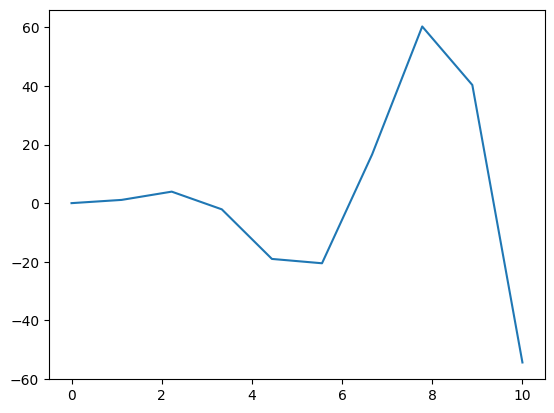

In [16]:
plt.plot(x_dense, y_dense)

In [17]:
f = interp1d(x,y,kind='cubic')
x_dense=np.linspace(0,10,100)
y_dense=f(x_dense)

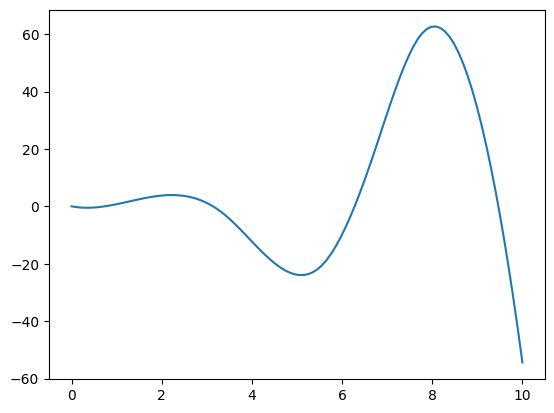

In [18]:
plt.plot(x_dense, y_dense)

# Curve Fitting

Example

In [19]:
x_data = np.linspace(0,10,10)
y_data = 3*x_data**2 + 2

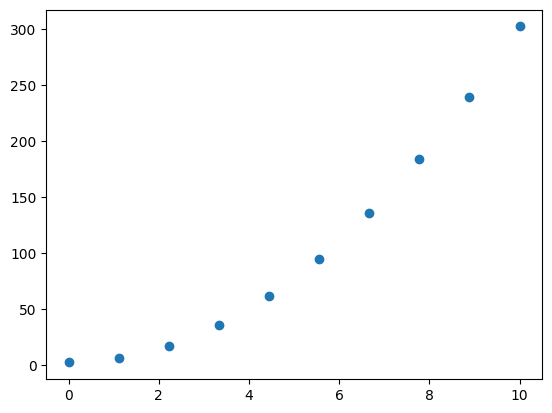

In [20]:
plt.scatter(x_data, y_data)

want to fit the data to the curve $y=ax^2 + b$. The main goal here is to determine a and b.

In [21]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x**2 + b

popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1)) #p0=initial guess

In [22]:
popt #optimal parameters of a and b

array([3., 2.])

In [23]:
pcov #estimate of errors on the parameters and how they are related

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])

The equation for spring motion is $y(t)= A cos(\omega t + \phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [24]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

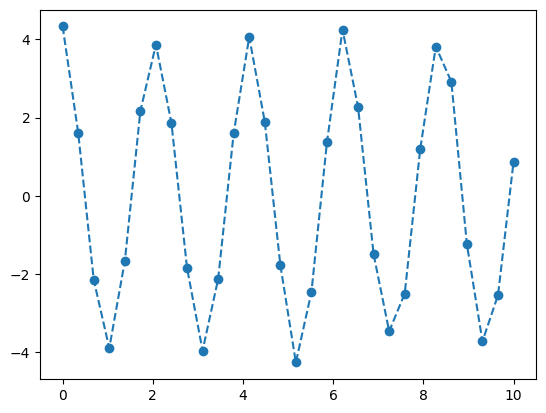

In [25]:
plt.plot(t_data, y_data, 'o--')

$\omega=2\pi f, f=1/T$, and $T\approx 2$ seconds (from the plot). Thus the good initial guess is: 
* $\omega = 2\pi(1/2) = \pi$
* $ A = 4$
* $ \phi = 0$


In [26]:
def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))

In [27]:
popt #the parameters

array([3.94836219, 2.99899521, 0.10411352])

In [28]:
A, w, phi = popt

In [29]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

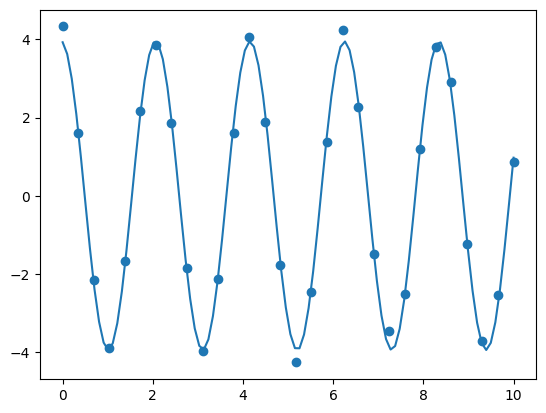

In [30]:
plt.scatter(t_data, y_data)
plt.plot(t,y)

In [31]:
w

2.998995205451252

In [32]:
pcov #error

array([[ 2.61882717e-03, -4.94131505e-06,  3.47404558e-05],
       [-4.94131505e-06,  1.85637335e-05, -9.60755036e-05],
       [ 3.47404558e-05, -9.60755036e-05,  6.63423791e-04]])

In [33]:
np.sqrt(np.diag(pcov)) #The estimated error on the parameters

array([0.05117448, 0.00430857, 0.02575701])

# Special Functions

Legendre Polynomials $P_1 (x)$: satisfy $(1-x^2) y'' + xy' + (x^2 - \alpha'')y = 0$ 
* The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

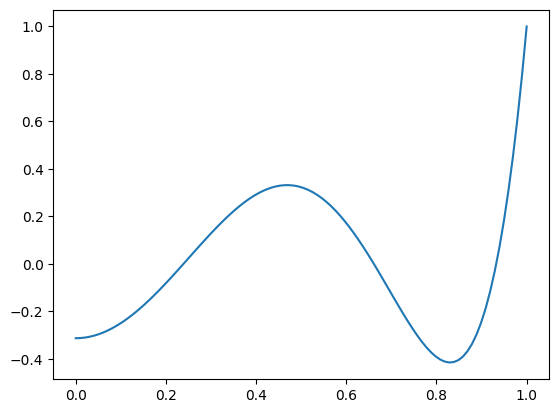

In [34]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

In [35]:
legendre(6)

poly1d([ 1.44375000e+01,  0.00000000e+00, -1.96875000e+01,  1.60288449e-15,
        6.56250000e+00,  0.00000000e+00, -3.12500000e-01])

In [36]:
legendre(6)(x)

array([-0.3125    , -0.31183063, -0.30982498, -0.30649042, -0.30183921,
       -0.29588849, -0.28866022, -0.28018113, -0.27048269, -0.259601  ,
       -0.24757672, -0.234455  , -0.22028534, -0.20512149, -0.18902132,
       -0.17204669, -0.1542633 , -0.13574052, -0.1165512 , -0.09677155,
       -0.07648089, -0.05576147, -0.03469823, -0.01337862,  0.00810769,
        0.02966902,  0.05121194,  0.07264159,  0.09386188,  0.11477587,
        0.135286  ,  0.15529446,  0.17470346,  0.19341564,  0.21133433,
        0.228364  ,  0.24441054,  0.25938173,  0.27318756,  0.28574066,
        0.29695673,  0.30675493,  0.31505837,  0.32179447,  0.32689553,
        0.3302991 ,  0.33194851,  0.33179336,  0.32979001,  0.3259021 ,
        0.32010106,  0.31236669,  0.30268763,  0.29106199,  0.27749789,
        0.26201403,  0.24464031,  0.22541838,  0.20440232,  0.18165921,
        0.15726978,  0.13132908,  0.1039471 ,  0.07524946,  0.04537808,
        0.01449189, -0.01723251, -0.04960009, -0.08239669, -0.11

Bessel Functions $ J_\alpha (x):$ satisty $ x^2y'' + xy' + (x^2 - \alpha^2)y = 0 $
* Laplace's Equation in Polar Coordinates

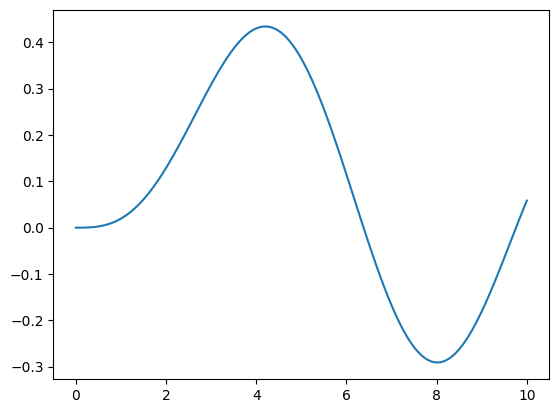

In [37]:
from scipy.special import jv
x = np.linspace(0,10,100)
plt.plot(x, jv(3,x))
plt.show()

# Calculus

# Differentiation

In [38]:
from scipy.misc import derivative

In [39]:
x = np.linspace(0,1,100)

In [40]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

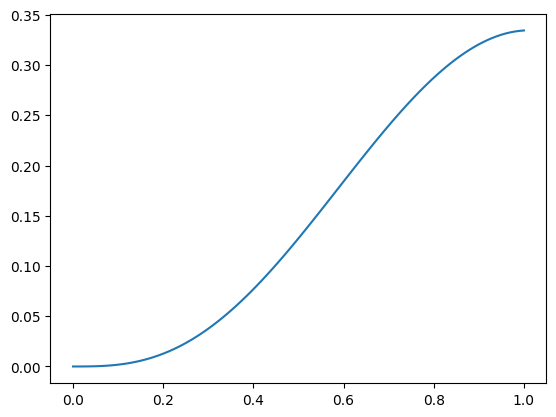

In [41]:
plt.plot(x, f(x))

In [42]:
derivative(f, x, dx=1e-6)

C:\Users\Sandesh\AppData\Local\Temp\ipykernel_9380\4183743391.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f, x, dx=1e-6)


array([2.00000000e-12, 6.03920829e-04, 2.38251311e-03, 5.28577629e-03,
       9.26344114e-03, 1.42650411e-02, 2.02399819e-02, 2.71376096e-02,
       3.49072761e-02, 4.34984041e-02, 5.28605490e-02, 6.29434594e-02,
       7.36971364e-02, 8.50718897e-02, 9.70183930e-02, 1.09487737e-01,
       1.22431481e-01, 1.35801703e-01, 1.49551043e-01, 1.63632755e-01,
       1.78000746e-01, 1.92609622e-01, 2.07414723e-01, 2.22372164e-01,
       2.37438874e-01, 2.52572626e-01, 2.67732071e-01, 2.82876773e-01,
       2.97967232e-01, 3.12964916e-01, 3.27832284e-01, 3.42532814e-01,
       3.57031020e-01, 3.71292476e-01, 3.85283835e-01, 3.98972845e-01,
       4.12328366e-01, 4.25320382e-01, 4.37920015e-01, 4.50099539e-01,
       4.61832383e-01, 4.73093145e-01, 4.83857594e-01, 4.94102681e-01,
       5.03806534e-01, 5.12948470e-01, 5.21508990e-01, 5.29469779e-01,
       5.36813708e-01, 5.43524827e-01, 5.49588364e-01, 5.54990719e-01,
       5.59719457e-01, 5.63763301e-01, 5.67112124e-01, 5.69756939e-01,
      

C:\Users\Sandesh\AppData\Local\Temp\ipykernel_9380\2419355624.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6))
C:\Users\Sandesh\AppData\Local\Temp\ipykernel_9380\2419355624.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6, n=2)) #higher order derivative|


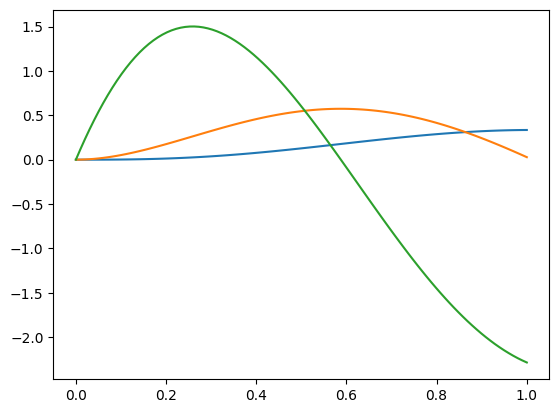

In [43]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
plt.plot(x, derivative(f, x, dx=1e-6, n=2)) #higher order derivative|

# Integration

Single Integrals $$\int \limits_{0}^{1} x^2sin(2x)e^{-x} dx$$

In [44]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [45]:
integral

0.10246777930717413

In [46]:
integral_error

1.1376208786903388e-15

Double Integrals $$ \int \limits_{0}^{1} \int \limits_{-x}^{x^2} sin(x+y^2)dydx $$

In [47]:
from scipy.integrate import dblquad
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x:-x
upr_y = lambda x:x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [48]:
integral

0.590090324408853

In [49]:
integral_error

2.0545915475811425e-14

In [50]:
from scipy.integrate import nquad

In [51]:
nquad?

Signature: nquad(func, ranges, args=None, opts=None, full_output=False)
Docstring:
Integration over multiple variables.

Wraps `quad` to enable integration over multiple variables.
Various options allow improved integration of discontinuous functions, as
well as the use of weighted integration, and generally finer control of the
integration process.

Parameters
----------
func : {callable, scipy.LowLevelCallable}
    The function to be integrated. Has arguments of ``x0, ... xn``,
    ``t0, ... tm``, where integration is carried out over ``x0, ... xn``,
    which must be floats.  Where ``t0, ... tm`` are extra arguments
    passed in args.
    Function signature should be ``func(x0, x1, ..., xn, t0, t1, ..., tm)``.
    Integration is carried out in order.  That is, integration over ``x0``
    is the innermost integral, and ``xn`` is the outermost.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

     

# Differential Equations
**First Order ODEs** <br>
Air friction while falling $$ v' - \alpha v^2 + \beta = 0 ; v(0)=0$$

In [52]:
from scipy.integrate import odeint

In [53]:
def dvdt(v, t):
    return 3 * v**2 - 5  # v' = alpha*v^2 - beta, putting alpha=3 and beta=5
v0 = 0

In [54]:
t = np.linspace(0,1,100)
sol = odeint(dvdt, v0, t)

In [55]:
sol

array([[ 0.        ],
       [-0.05047933],
       [-0.10080451],
       [-0.15082334],
       [-0.20038726],
       [-0.24935318],
       [-0.29758502],
       [-0.34495519],
       [-0.39134576],
       [-0.43664948],
       [-0.48077056],
       [-0.52362515],
       [-0.56514164],
       [-0.60526086],
       [-0.6439356 ],
       [-0.68113064],
       [-0.71682205],
       [-0.75099661],
       [-0.78365109],
       [-0.8147914 ],
       [-0.84443176],
       [-0.87259378],
       [-0.89930556],
       [-0.92460079],
       [-0.94851787],
       [-0.97109913],
       [-0.99239002],
       [-1.01243837],
       [-1.03129376],
       [-1.04900692],
       [-1.06562918],
       [-1.081212  ],
       [-1.0958066 ],
       [-1.10946355],
       [-1.12223249],
       [-1.13416195],
       [-1.14529906],
       [-1.15568941],
       [-1.16537698],
       [-1.17440397],
       [-1.18281086],
       [-1.19063623],
       [-1.19791686],
       [-1.20468768],
       [-1.21098179],
       [-1

In [56]:
sol.T

array([[ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
        -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
        -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
        -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
        -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
        -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
        -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
        -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
        -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
        -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
        -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
        -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
        -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
        -1.27512464, -1.2763122 , -1.27741137, -1.2

In [57]:
sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

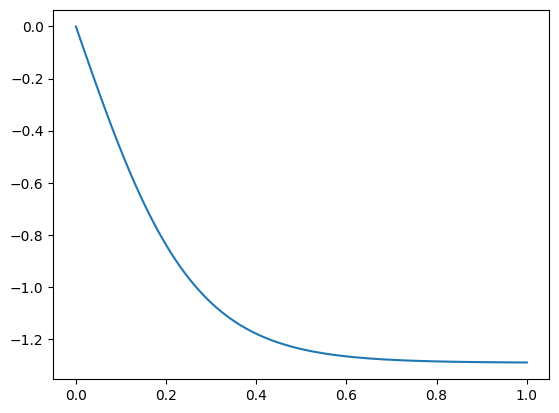

In [58]:
plt.plot(t, sol.T[0])

**Coupled First Order ODEs**
<br>
$$ y'_1 = y_1 + y_2 ^ 2 + 3x, y_1(0) = 0 $$
$$ y'_2 = 3y_1 + y_2^3 - cos(x), y_2(0) = 0 $$

Letting $S = (y_1, y_2)$, we need to write a function that returns $dS/dx = (dy_1 / dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$.

In [59]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2 ** 2 + 3 * x,
           3 * y1 + y2 ** 3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [60]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [61]:
sol

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.53914061e-04, -1.00992734e-02],
       [ 6.19093356e-04, -2.01882005e-02],
       [ 1.40076628e-03, -3.02563164e-02],
       [ 2.50418953e-03, -4.02930766e-02],
       [ 3.93464633e-03, -5.02878361e-02],
       [ 5.69744401e-03, -6.02298432e-02],
       [ 7.79789517e-03, -7.01082428e-02],
       [ 1.02413187e-02, -7.99120712e-02],
       [ 1.30330245e-02, -8.96302498e-02],
       [ 1.61783065e-02, -9.92515816e-02],
       [ 1.96824391e-02, -1.08764749e-01],
       [ 2.35506573e-02, -1.18158303e-01],
       [ 2.77881638e-02, -1.27420669e-01],
       [ 3.24001125e-02, -1.36540133e-01],
       [ 3.73915921e-02, -1.45504834e-01],
       [ 4.27676179e-02, -1.54302762e-01],
       [ 4.85331404e-02, -1.62921756e-01],
       [ 5.46930282e-02, -1.71349495e-01],
       [ 6.12520553e-02, -1.79573493e-01],
       [ 6.82148995e-02, -1.87581095e-01],
       [ 7.55861308e-02, -1.95359467e-01],
       [ 8.33702071e-02, -2.02895598e-01],
       [ 9.

In [62]:
sol.T

array([[ 0.00000000e+00,  1.53914061e-04,  6.19093356e-04,
         1.40076628e-03,  2.50418953e-03,  3.93464633e-03,
         5.69744401e-03,  7.79789517e-03,  1.02413187e-02,
         1.30330245e-02,  1.61783065e-02,  1.96824391e-02,
         2.35506573e-02,  2.77881638e-02,  3.24001125e-02,
         3.73915921e-02,  4.27676179e-02,  4.85331404e-02,
         5.46930282e-02,  6.12520553e-02,  6.82148995e-02,
         7.55861308e-02,  8.33702071e-02,  9.15714669e-02,
         1.00194121e-01,  1.09242251e-01,  1.18719801e-01,
         1.28630571e-01,  1.38978219e-01,  1.49766252e-01,
         1.60998020e-01,  1.72676732e-01,  1.84805434e-01,
         1.97387014e-01,  2.10424222e-01,  2.23919648e-01,
         2.37875730e-01,  2.52294784e-01,  2.67178978e-01,
         2.82530347e-01,  2.98350829e-01,  3.14642248e-01,
         3.31406342e-01,  3.48644774e-01,  3.66359140e-01,
         3.84551013e-01,  4.03221942e-01,  4.22373488e-01,
         4.42007253e-01,  4.62124894e-01,  4.82728181e-0

In [63]:
y1 = sol.T[0]
y2 = sol.T[1]

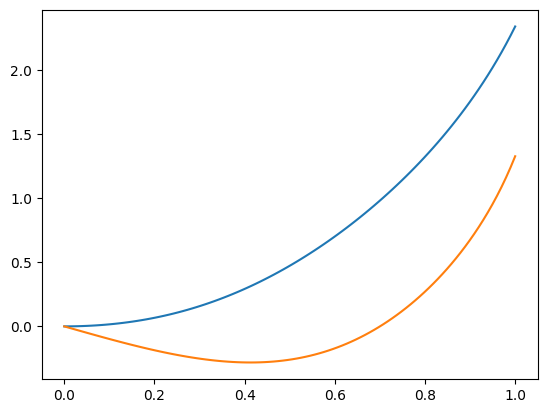

In [64]:
plt.plot(x, y1)
plt.plot(x, y2)

Second Order ODEs
Equation for a pendulum $$ \theta'' - sin(\theta) = 0 $$ <br>
Scipy can only solve coupled first ODEs, but **any second order ODE can be turned into two coupled first order ODEs**. The same thing goes for higher order ODEs.  <br>
Define $\omega = d\theta / dt $ so that one has the following coupled ODEs. <br>
$$ d\omega / dt = sin(\theta) $$
$$ d\theta /dt = \omega $$ <br>
Let $ S = (\theta, \omega) $


In [65]:
def dSdt(S, t):
    theta, omega = S
    return [omega, np.sin(theta)]

theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

In [66]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

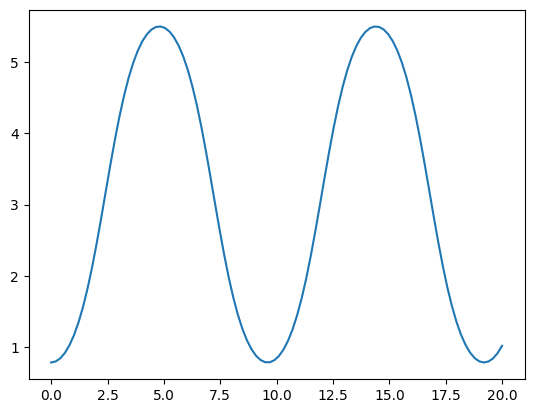

In [67]:
plt.plot(t, theta)
plt.show()

# Fourier Transforms

The discrete Fourier Transform is defined as:
$$ y[k] = \sum \limits_{n=0}^{N-1} e^{-2\pi\ln(k/N)}x[n] $$ <br>
* k/N represents a specific frequency (dimensionless)
* can be converted to a frequency (Hz) if you know spacing in x

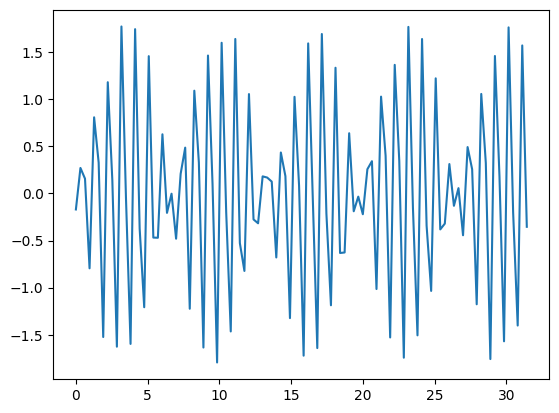

In [70]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + 0.1*np.random.randn(len(t))
plt.plot(t,x)

In [71]:
from scipy.fft import fft, fftfreq
N = len(x)
y = fft(x)

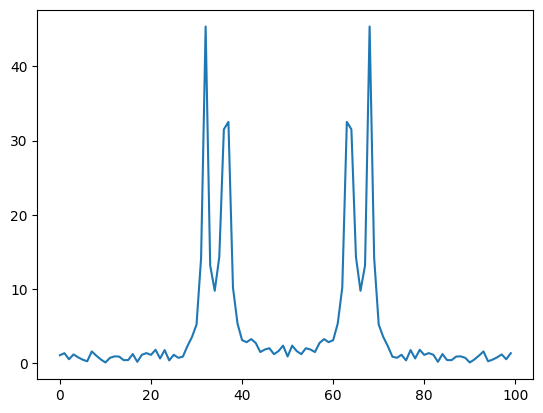

In [73]:
plt.plot(np.abs(y))

In [74]:
y = fft(x)[:N//2]
f = fftfreq(N, np.diff(t)[0])[:N//2]

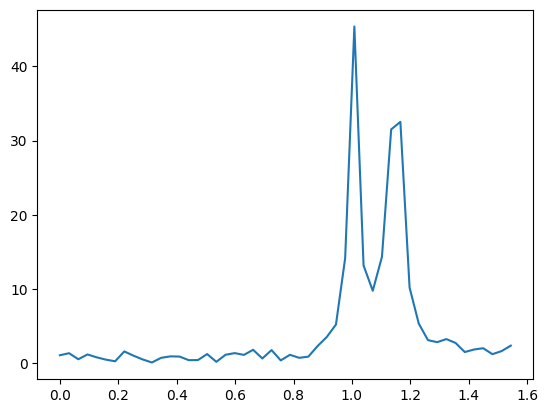

In [75]:
plt.plot(f, np.abs(y))

# Examples

The energy required to get from point $\vec{r_1}$ to point $\vec{r_2}$ for a plane is given by <br>
$$ E = \alpha \int \limits_{C} \bigg| \frac {d\vec{r}}{dt} \bigg|dt - \int \limits_{C}  \vec{F}. \frac {d\vec{r}}{dt}$$ <br> 
Suppose that $\alpha = 5$ and out start and ends points are $\vec {r_1} = (0,0)$ and $\vec{r_2} = (0,10)$. On this particular day, the wind produces a force field $\vec{F} = (0, -2/(x+1)^2)$. Find the optimal value of $A$ in $\vec{r}(t) = Asin(\pi t/10)\hat{x} + t\hat{y}$ that minimizes the work. <br>
Then $ x = Asin(\pi t /10), y = t, $ and <br>
$$ \bigg |\frac{d \vec{r}}{dt} \bigg | = \sqrt{1 + (\pi A/10)^2 cos^2(\pi t/10)} $$
$$ \vec{F}.\frac{d\vec{r}}{dt} = \begin{bmatrix} 0 \\ -2/(Asin(\pi t/10) + 1)^2 \end{bmatrix} . \begin{bmatrix} \pi A/ 10 cos(\pi t/ 10) \\ 1 \end{bmatrix} = -2/(A sin(\pi t/10) +1)^2$$
<br>so that
$$ E = \int \limits_{0}^{10}\bigg( 5\sqrt{1+(\pi A/10)^2 cos^2(\pi t/10)} + \frac{2}{(A sin (\pi t/10) + 100)^2} \bigg)dt $$

In [76]:
def f(A): 
    integrand = lambda t: 2 / (1 + np.abs(A*np.sin(np.pi*t/10)))**2 + 5*np.sqrt(1+(np.pi*A/10)**2 * np.cos(np.pi * t / 10)**2)
    return quad(integrand, 0, 10)[0]

minimize(f, 0.001, method="CG").x

array([1.42591231])

Newton's law of cooling is $$ \frac{dT}{dt} = - k(T -T_s(t)) $$ where $T$ is the temperature of an object in the surroundings with temperature $ T_s(t)$ (which may depend on time). Suppose $T$ represents the temperature of a shallow pool of water and $T_s(t)$ represents the temperature of outside. Find $T(t)$ given that you collected measurements of the outside.

In [77]:
t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

Text(0, 0.5, 'Temperature [K]')

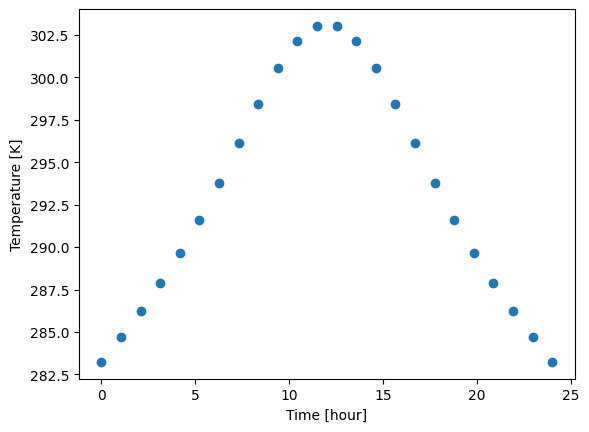

In [78]:
plt.scatter(t_m, temp_m)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [79]:
Ts = interp1d(t_m, temp_m, kind='cubic')

In [80]:
def dTdt(T, t):
    return -0.5*(T-Ts(t))

times = np.linspace(1, 23, 1000)
T0 = 284.6945461

In [81]:
sol = odeint(dTdt, T0, times).T[0]

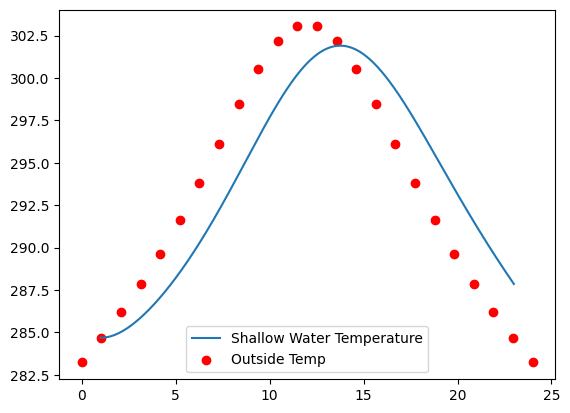

In [83]:
plt.plot(times, sol, label = 'Shallow Water Temperature')
plt.scatter(t_m, temp_m, color ='r', label = 'Outside Temp')
plt.legend()

# Linear Algebra

### Basics

Triangular Matrices
$$ \begin {bmatrix} 3 & 0 & 0 & 0 \\ 2 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 \end {bmatrix} \vec{x} = \begin {bmatrix} 4 \\ 2 \\ 4 \\ 2 \end {bmatrix} $$

In [85]:
from scipy.linalg import solve_triangular
a = np.array([[3,0,0,0],
             [2,1,0,0],
             [1,0,1,0],
             [1,1,1,1]])

b = np.array([4,2,4,2])

In [87]:
x = solve_triangular(a, b, lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

Toeplitz Matrices (matrices with constant diagonals)

$$ \begin {bmatrix} 1 & -1 & 2 & 3 \\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1  \end {bmatrix} \vec{x} = \begin {bmatrix} 1 \\ 2\\ 2 \\ 5 \end {bmatrix} $$

In [88]:
from scipy.linalg import solve_toeplitz, toeplitz

In [89]:
c = np.array([1, 3, 6, 10])
r = np.array([1, -1, 2, 3])
b = np.array([1, 2, 2, 5])
x = solve_toeplitz((c,r), b)
x

array([ 0.17741935,  0.48387097, -0.0483871 ,  0.46774194])

In [92]:
toeplitz(c,r)

array([[ 1, -1,  2,  3],
       [ 3,  1, -1,  2],
       [ 6,  3,  1, -1],
       [10,  6,  3,  1]])

# Eigenvalue Problems

Eigenvalue Problems can be solved using numpy, so here we focus on particular cases for optimization

$$ \begin{bmatrix} 3 & -1 & 0 & 0 \\ -1 & 3 & -1 & 0 \\ 0 & -1 & 3 & -1 \\ 0 & 0 & -1 & 3 \end{bmatrix} \vec{x} = \lambda x $$

In [94]:
from scipy.linalg import eigh_tridiagonal

In [95]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w,v = eigh_tridiagonal(d,e)

In [99]:
w #eigen values

array([1.38196601, 2.38196601, 3.61803399, 4.61803399])

In [100]:
v #eigen vectors

array([[ 0.37174803,  0.60150096,  0.60150096,  0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803, -0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803,  0.60150096],
       [ 0.37174803, -0.60150096,  0.60150096, -0.37174803]])

In [103]:
v.T

array([[ 0.37174803,  0.60150096,  0.60150096,  0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803, -0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803,  0.60150096],
       [ 0.37174803, -0.60150096,  0.60150096, -0.37174803]])

In [104]:
v.T[0] #first eigen vector

array([0.37174803, 0.60150096, 0.60150096, 0.37174803])

In [106]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [107]:
A@v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

In [110]:
w[1]*v.T[1]

array([ 1.43275483,  0.88549118, -0.88549118, -1.43275483])

In [111]:
A@v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

In [112]:
w[0]*v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

# Special Matrices

Fiedler matrix $A_{ij} = |a_i - a_j|$ where $a_i$ is some sequence of numbers

In [113]:
from scipy.linalg import fiedler
fiedler([1,4,12,45])

array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

Toeplitz matrices (matrices with constant diagonals)

In [116]:
from scipy.linalg import toeplitz
toeplitz([1,2,3,4,0,0],[1,4,5,6,0,0])

array([[1, 4, 5, 6, 0, 0],
       [2, 1, 4, 5, 6, 0],
       [3, 2, 1, 4, 5, 6],
       [4, 3, 2, 1, 4, 5],
       [0, 4, 3, 2, 1, 4],
       [0, 0, 4, 3, 2, 1]])

more on special matrices: https://docs.scipy.org/doc/scipy/reference/linalg.html#special-matrices

# Decompositions

LU decomposition $A = PLU$ where $P$ is a permutation matrix, $L$ is a lower triangular matrix and $U$ is an upper triangular matrix.

In [118]:
from scipy.linalg import lu
A = np.array([[2,5,7,8],
             [5,2,2,8],
             [7,5,6,6],
             [5,4,4,8]])

In [119]:
p, l, u = lu(A)

In [120]:
p

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [121]:
l

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.28571429,  1.        ,  0.        ,  0.        ],
       [ 0.71428571,  0.12      ,  1.        ,  0.        ],
       [ 0.71428571, -0.44      , -0.04347826,  1.        ]])

In [122]:
u

array([[ 7.        ,  5.        ,  6.        ,  6.        ],
       [ 0.        ,  3.57142857,  5.28571429,  6.28571429],
       [ 0.        ,  0.        , -0.92      ,  2.96      ],
       [ 0.        ,  0.        ,  0.        ,  6.60869565]])

Choleski decomposition: find matrix C such that $A = CC^T$

In [123]:
from scipy.linalg import cholesky

A = np.array([[1, 0.2], [0.2, 1]])
C = cholesky(A, lower=True)

In [124]:
C

array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

# Sparse Matrices